<div align="center">
  <h2>🕳️ Pothole Detection / Détection des nids-de-poule avec YOLOv8 🕳️⚠️</h2>
</div>

<hr>



## Installation de la librairie YOLOv8 (Ultralytics)



In [ ]:
# Installation de la bibliothèque Ultralytics qui contient YOLOv8
!pip install ultralytics

## Connexion à Roboflow et téléchargement du dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WOEIhHEtFCkiw7ijksRS")
project = rf.workspace("myriamcv").project("pothole_detection-ogsdh")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole_detection-2 in yolov8:: 100%|██████████| 1312/1312 [00:00<00:00, 3719.12it/s]


## Entraînement du modèle YOLOv8 sur les données

In [ ]:
!yolo 

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole_detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=240, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

## Liste du dossier de résultats d’entraînement

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
ls $HOME/runs/detect/train/

args.yaml                        R_curve.png           train_batch2.jpg
confusion_matrix_normalized.png  results.csv           val_batch0_labels.jpg
confusion_matrix.png             results.png           val_batch0_pred.jpg
F1_curve.png                     train_batch0.jpg      val_batch1_labels.jpg
labels_correlogram.jpg           train_batch10830.jpg  val_batch1_pred.jpg
labels.jpg                       train_batch10831.jpg  val_batch2_labels.jpg
P_curve.png                      train_batch10832.jpg  val_batch2_pred.jpg
PR_curve.png                     train_batch1.jpg      weights/


## Affichage de la matrice de confusion

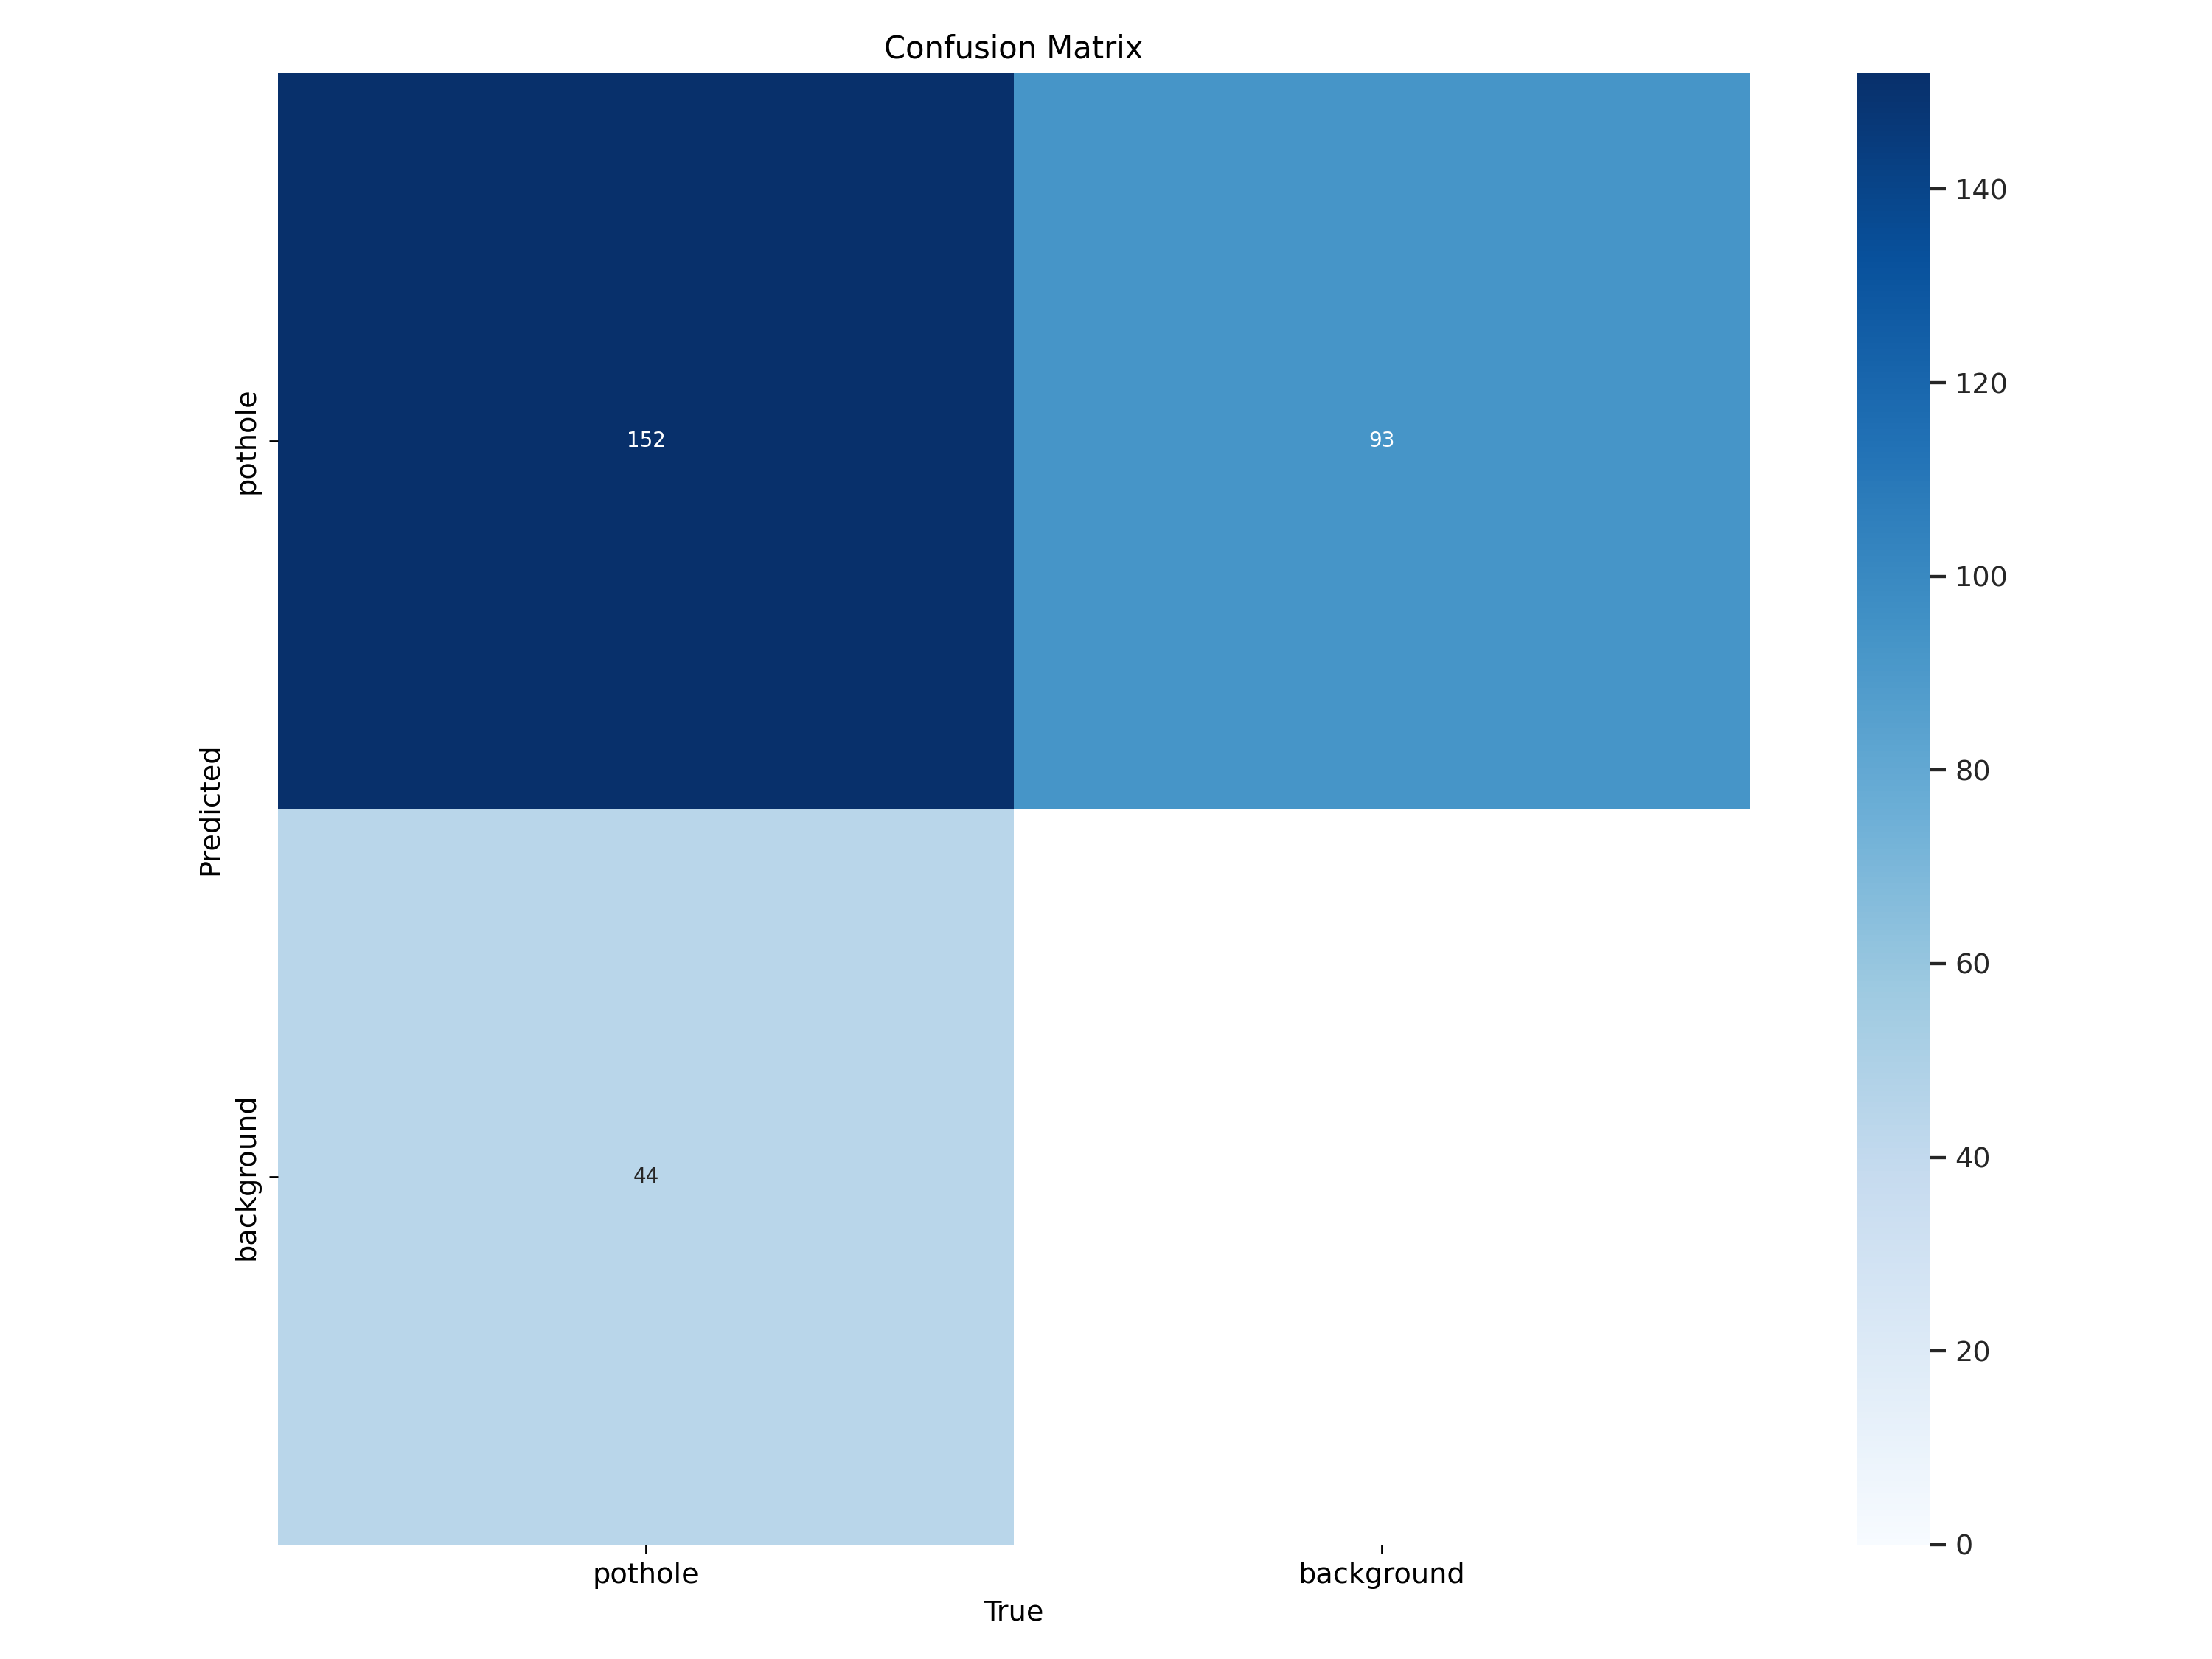

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

## Évaluer les performances

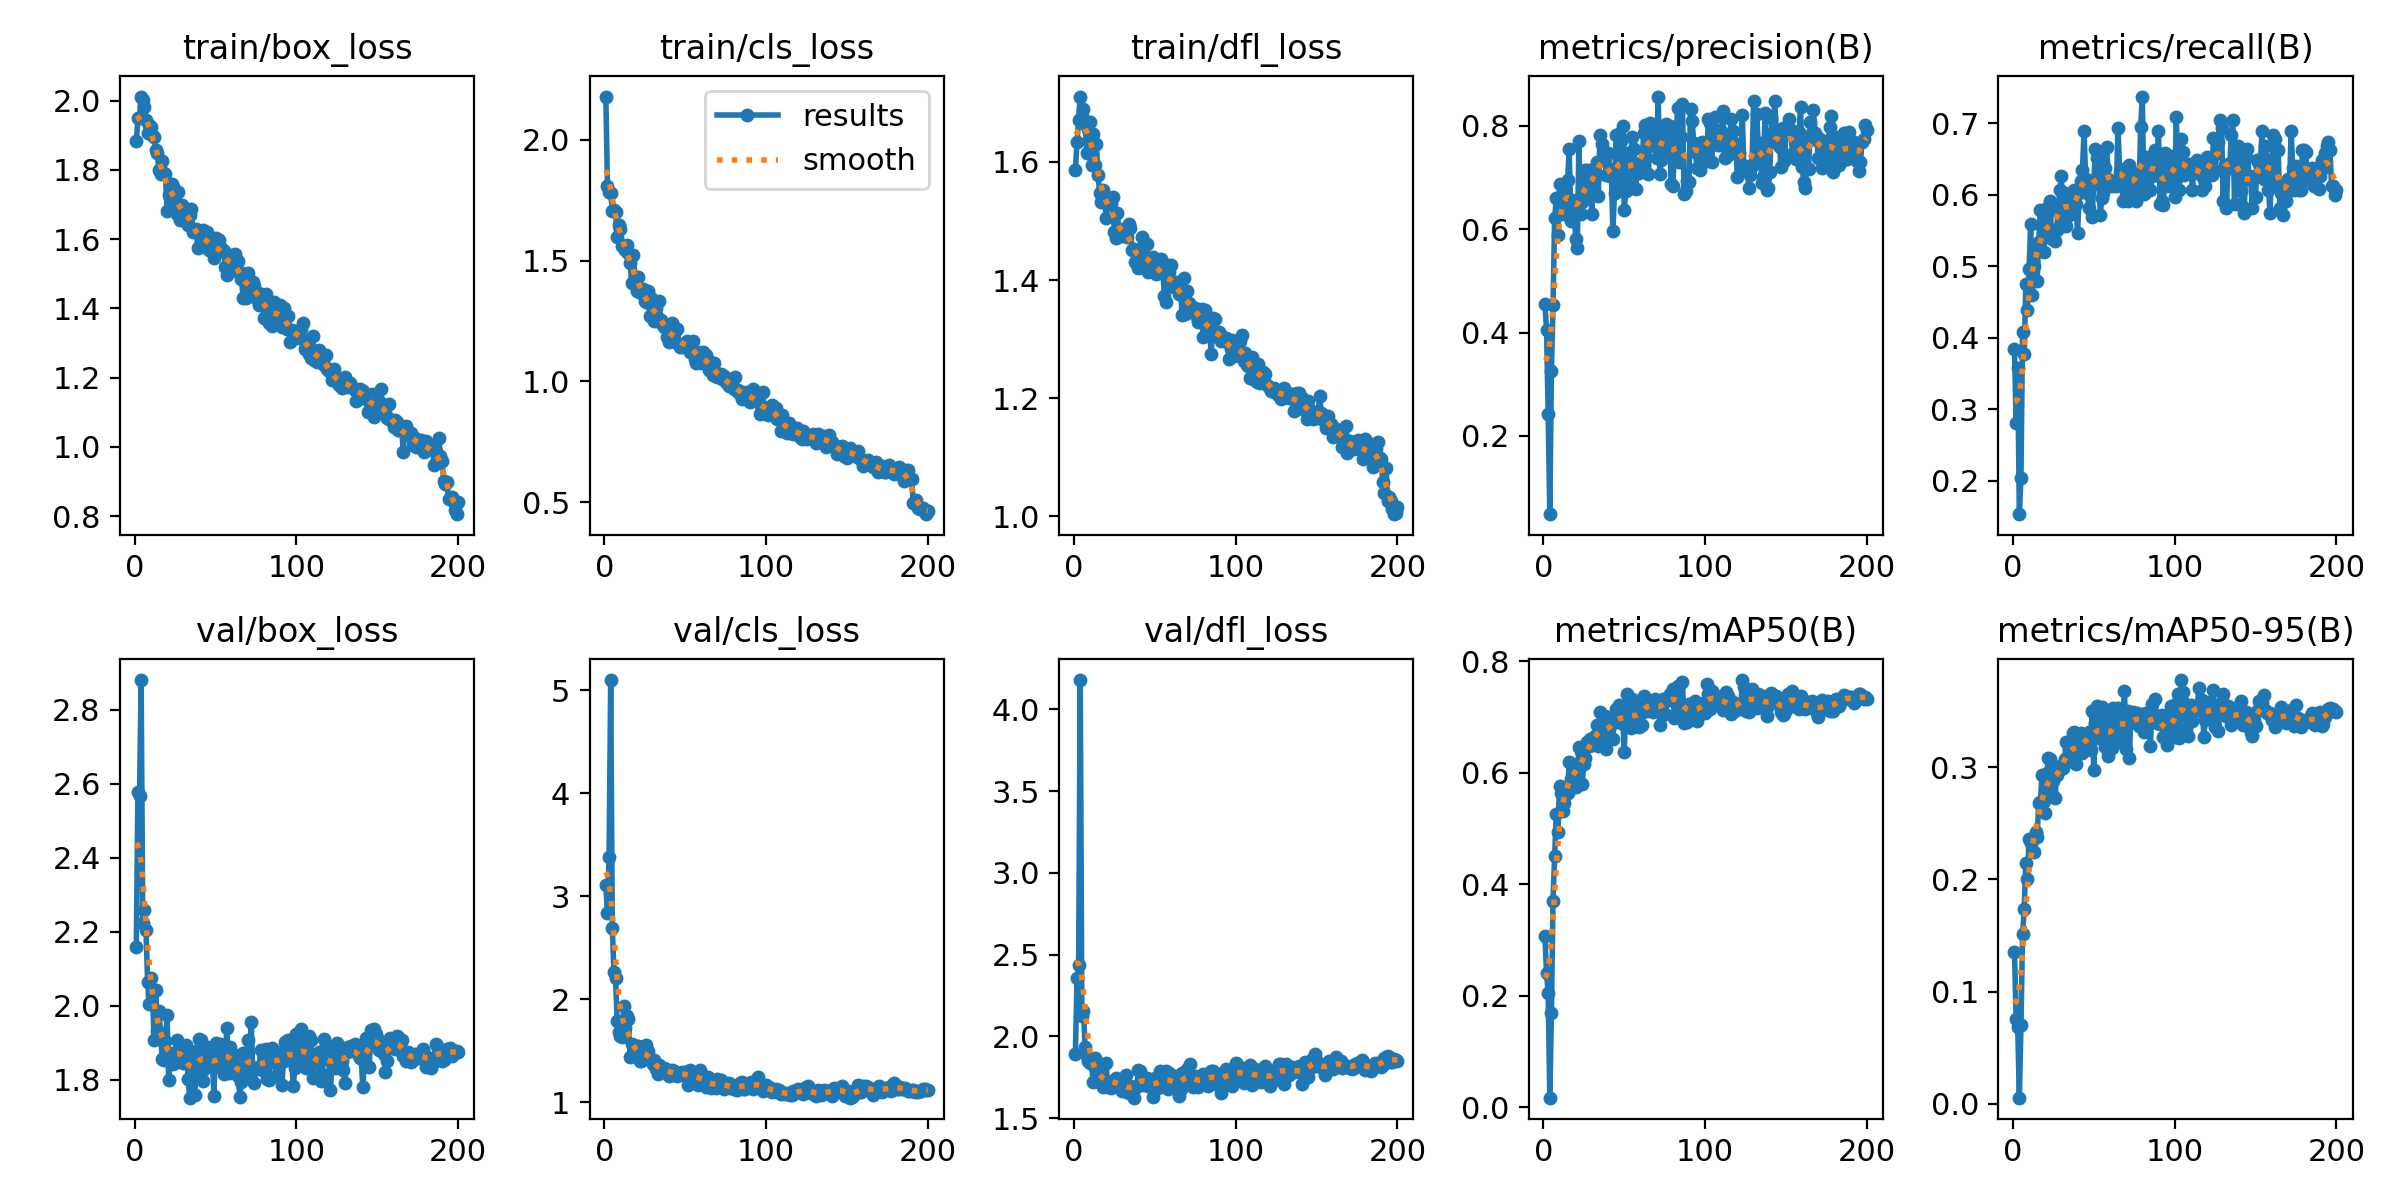

In [ ]:
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Visualisation des prédictions du modèle sur les données de validation

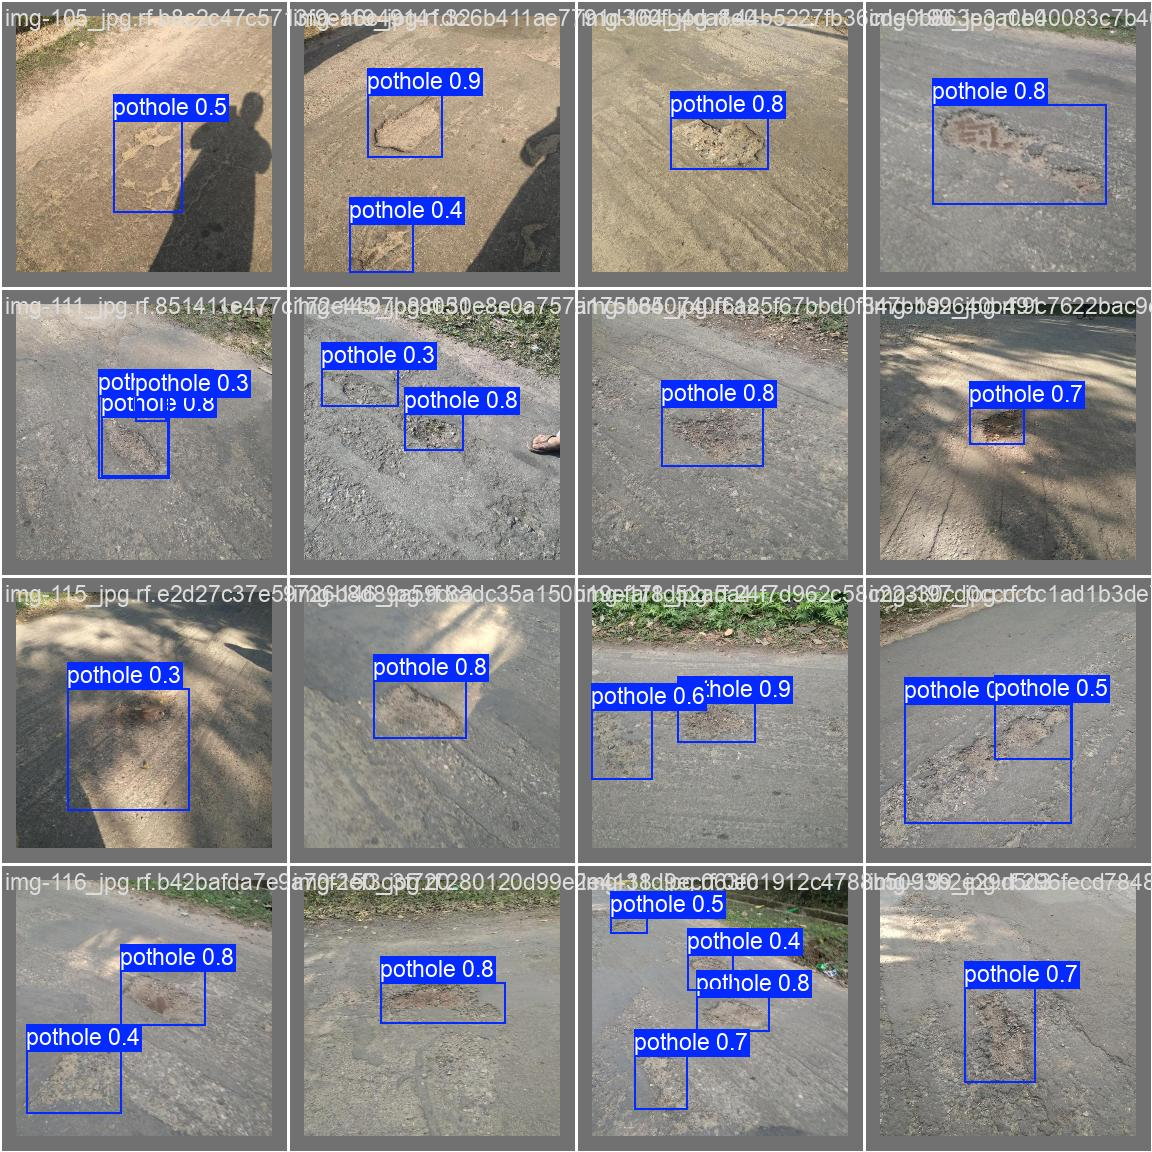

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1985.5±582.8 MB/s, size: 75.8 KB)
val: Scanning /content/Pothole_detection-2/valid/labels.cache... 130 images, 0 backgrounds, 0 corrupt: 100% 130/130 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:01<00:00,  4.59it/s]
                   all        130        196      0.731      0.679      0.747      0.378
Speed: 0.6ms preprocess, 4.2ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# import glob
# from IPython.display import Image, display
# import os

# # Définir HOME si ce n'est pas déjà fait
# HOME = os.getcwd()

# # Lister les images .JPG dans le dossier
# image_paths = glob.glob(f'{HOME}/runs/detect/predict3/*.JPG')

# # Afficher seulement la première image trouvée ([:1] est sur la liste)
# for imagepath in image_paths[:1]:
#     display(Image(filename=imagepath, width=600))
#     print("\n")


## Prédiction sur une vidéo avec le modèle entraîné

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/852) /content/pothole-video.mp4: 160x256 (no detections), 43.7ms
video 1/1 (frame 2/852) /content/pothole-video.mp4: 160x256 (no detections), 7.2ms
video 1/1 (frame 3/852) /content/pothole-video.mp4: 160x256 (no detections), 8.7ms
video 1/1 (frame 4/852) /content/pothole-video.mp4: 160x256 (no detections), 8.1ms
video 1/1 (frame 5/852) /content/pothole-video.mp4: 160x256 (no detections), 7.3ms
video 1/1 (frame 6/852) /content/pothole-video.mp4: 160x256 (no detections), 7.4ms
video 1/1 (frame 7/852) /content/pothole-video.mp4: 160x256 (no detections), 7.1ms
video 1/1 (frame 8/852) /content/pothole-video.mp4: 160x256 (no detections), 7.3ms
video 1/1 (frame 9/852) /content/pothole-video.mp4: 160x256 (no detections), 7.3ms
video 1/1 (frame 10/852) /content/pothole-video.mp4: 160x256 (no detections), 7.4ms
vi

## Exporter le modèle pour une utilisation future

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Prédiction sur une vidéo

In [ ]:
!yolo task=detect mode=predict model=/content/pothole_detection.pt conf=0.25 source=/content/pothole.mp4

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/692) /content/pothole.mp4: 160x256 5 potholes, 40.2ms
video 1/1 (frame 2/692) /content/pothole.mp4: 160x256 3 potholes, 8.3ms
video 1/1 (frame 3/692) /content/pothole.mp4: 160x256 4 potholes, 8.6ms
video 1/1 (frame 4/692) /content/pothole.mp4: 160x256 5 potholes, 8.3ms
video 1/1 (frame 5/692) /content/pothole.mp4: 160x256 2 potholes, 8.3ms
video 1/1 (frame 6/692) /content/pothole.mp4: 160x256 2 potholes, 8.6ms
video 1/1 (frame 7/692) /content/pothole.mp4: 160x256 3 potholes, 8.1ms
video 1/1 (frame 8/692) /content/pothole.mp4: 160x256 2 potholes, 8.2ms
video 1/1 (frame 9/692) /content/pothole.mp4: 160x256 2 potholes, 9.6ms
video 1/1 (frame 10/692) /content/pothole.mp4: 160x256 2 potholes, 8.2ms
video 1/1 (frame 11/692) /content/pothole.mp4: 160x256 3 potholes, 7.9ms
video 1/1 (frame 12/692) /content/potho